
# Bitcoin Market Sentiment vs Historical Trader Behaviour (Hyperliquid)

This notebook analyzes how **trading behaviour** (profitability, risk, volume, side of trades) on Hyperliquid aligns or diverges from the **Bitcoin market sentiment** (Fear / Greed).
This notebook has also analyzed the hiiden trends or signals that helps in influencing smarter trading strategies.

**Datasets:**

1. `fear_greed_index.csv` — Bitcoin market sentiment (Fear / Greed / Extreme Fear / Extreme Greed / Neutral)
2. `historical_data.csv` — Hyperliquid trader-level execution history


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the datasets

sent_path = "csv_files/fear_greed_index.csv"
hist_path = "csv_files/historical_data.csv"

sent = pd.read_csv(sent_path)
hist = pd.read_csv(hist_path)


In [3]:
sent.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,01-02-2018
1,1517549400,15,Extreme Fear,02-02-2018
2,1517635800,40,Fear,03-02-2018
3,1517722200,24,Extreme Fear,04-02-2018
4,1517808600,11,Extreme Fear,05-02-2018


In [4]:
hist.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [5]:

# Basic inspection
sent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


We can see that, Sentiment class csv file don't have any Null or empty values present.

In [6]:
sent.describe()

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [7]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

Here in historical dataset for trading analysis, none of the columns have null values or any missing values

In [8]:
hist.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


After the overall inspection of both historical and sentimental dataset it seems that, the provided dataset doesn't have any missing values or any noise data in it.

Our main objective is to analyze the trader behaviour changes depending on market sentiment, We need to merge the two datasets.


## 1. Data Cleaning & Date Alignment

Let's:
- Convert dates into a common **date** column.
- Match each trade to the **sentiment of that day**.


In [9]:
# Sentiment dataset: it ensures tha date is datetime.date
sent['date'] = pd.to_datetime(sent['date'], format = "%d-%m-%Y").dt.date

In [10]:
# Rename the column classication to Sentiment_class
sent.rename(columns={'classification' : 'sentiment_class'}, inplace=True)

In [11]:
sent = sent[['date', 'value', 'sentiment_class']]

We don't need the `timestamp` column from sentiment(fear_greed_index) dataset

In [12]:
sent.head()

,date,value,sentiment_class
0,2018-02-01,30,Fear
1,2018-02-02,15,Extreme Fear
2,2018-02-03,40,Fear
3,2018-02-04,24,Extreme Fear
4,2018-02-05,11,Extreme Fear


In [13]:
# In Hyperliquid dataset, lets convert Timestamp IST into datetime and extract date

hist['trade_datetime'] = pd.to_datetime(
    hist['Timestamp IST'],
    format='%d-%m-%Y %H:%M',
    errors='coerce'
)

# Extract date only
hist['trade_date'] = hist['trade_datetime'].dt.date

hist[['Timestamp IST', 'trade_datetime', 'trade_date']].head()


,Timestamp IST,trade_datetime,trade_date
0,02-12-2024 22:50,2024-12-02 22:50:00,2024-12-02
1,02-12-2024 22:50,2024-12-02 22:50:00,2024-12-02
2,02-12-2024 22:50,2024-12-02 22:50:00,2024-12-02
3,02-12-2024 22:50,2024-12-02 22:50:00,2024-12-02
4,02-12-2024 22:50,2024-12-02 22:50:00,2024-12-02


In [14]:

# Now Merge trades with sentiment by date and trade_date

merged = pd.merge(
    hist,
    sent[['date', 'value', 'sentiment_class']],
    left_on='trade_date',
    right_on='date',
    how='left'
)

print("Merged shape:", merged.shape)
merged[['trade_date', 'sentiment_class', 'value']].head()


Merged shape: (211224, 21)


,trade_date,sentiment_class,value
0,2024-12-02,Extreme Greed,80.0
1,2024-12-02,Extreme Greed,80.0
2,2024-12-02,Extreme Greed,80.0
3,2024-12-02,Extreme Greed,80.0
4,2024-12-02,Extreme Greed,80.0


Now the two dataset are now merged on `trade_date` from hist and `date` from sent datasets

In [15]:
merged.sample(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_datetime,trade_date,date,value,sentiment_class
16778,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,2738.500000,10.3280,28283.23,SELL,05-02-2025 05:31,-1271.653400,Open Short,0.000000,...,69647354460,False,0.000000,9.030000e+14,1.740000e+12,2025-02-05 05:31:00,2025-02-05,2025-02-05,54.0,Neutral
38070,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,OGN,0.058677,245.0000,14.38,BUY,22-04-2025 08:58,-17072.000000,Close Short,0.864360,...,87927651881,True,0.004829,8.010000e+13,1.750000e+12,2025-04-22 08:58:00,2025-04-22,2025-04-22,47.0,Neutral
34440,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,RUNE,1.518100,30.0000,45.54,BUY,01-02-2025 19:30,-30.000000,Close Short,-1.431000,...,68231440876,True,0.015302,1.050000e+15,1.740000e+12,2025-02-01 19:30:00,2025-02-01,2025-02-01,68.0,Greed
42660,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2338.500000,4.2809,10010.88,BUY,06-02-2024 20:54,8.437200,Open Long,0.000000,...,8953225254,True,2.502721,2.210000e+13,1.710000e+12,2024-02-06 20:54:00,2024-02-06,2024-02-06,64.0,Greed
179091,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,@107,13.209000,83.7200,1105.86,SELL,12-03-2025 15:40,2098.224665,Sell,13.733484,...,79310562342,True,0.331757,4.320000e+14,1.740000e+12,2025-03-12 15:40:00,2025-03-12,2025-03-12,34.0,Fear


Get a quick review on `merged` dataset

Lets save the New Merged Csv file in the csv_files folder

In [16]:
import os

output_dir = "csv_files"
os.makedirs(output_dir, exist_ok=True)

merged_file_path = os.path.join(output_dir, "merged.csv")

merged.to_csv(merged_file_path, index=False)

print("Merged CSV saved at:", merged_file_path)


Merged CSV saved at: csv_files\merged.csv



## 2. Feature Engineering

We create:
- **abs_pnl**: absolute profit/loss per trade  
- **is_profit**: whether the trade was profitable  
- **usd_volume**: USD notional of each trade (already given as `Size USD`)


In [17]:
# Closed PnL might be 0 for open trades
merged['Closed PnL'] = pd.to_numeric(merged['Closed PnL'], errors='coerce')

merged['abs_pnl'] = merged['Closed PnL'].abs()
merged['is_profit'] = merged['Closed PnL'] > 0
merged['usd_volume'] = pd.to_numeric(merged['Size USD'], errors='coerce')

#Quick check
merged[['Closed PnL', 'abs_pnl', 'is_profit', 'usd_volume']].head()


,Closed PnL,abs_pnl,is_profit,usd_volume
0,0.0,0.0,False,7872.16
1,0.0,0.0,False,127.68
2,0.0,0.0,False,1150.63
3,0.0,0.0,False,1142.04
4,0.0,0.0,False,69.75


In [18]:
merged.sample(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Trade ID,Timestamp,trade_datetime,trade_date,date,value,sentiment_class,abs_pnl,is_profit,usd_volume
22175,0x4f93fead39b70a1824f981a54d4e55b278e9f760,ETH,3316.00000,0.54580,1809.87,BUY,21-05-2024 00:57,4.8910,Open Long,0.000000,...,2.060000e+14,1.720000e+12,2024-05-21 00:57:00,2024-05-21,2024-05-21,76.0,Extreme Greed,0.000000,False,1809.87
150027,0xb899e522b5715391ae1d4f137653e7906c5e2115,SOL,116.03000,295.88000,34330.96,SELL,11-03-2025 00:26,7159.5800,Close Long,-1041.852656,...,3.050000e+14,1.740000e+12,2025-03-11 00:26:00,2025-03-11,2025-03-11,24.0,Extreme Fear,1041.852656,False,34330.96
138405,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,BTC,98874.00000,0.00011,10.88,BUY,27-01-2025 16:09,0.4027,Open Long,0.000000,...,8.270000e+14,1.740000e+12,2025-01-27 16:09:00,2025-01-27,2025-01-27,71.0,Greed,0.000000,False,10.88
135617,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,FARTCOIN,0.96341,150.50000,144.99,SELL,31-12-2024 02:08,-292.8000,Open Short,0.000000,...,1.960000e+14,1.740000e+12,2024-12-31 02:08:00,2024-12-31,2024-12-31,64.0,Greed,0.000000,False,144.99
135126,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,XRP,2.22670,69.00000,153.64,SELL,24-12-2024 15:58,-159.0000,Open Short,0.000000,...,8.520000e+14,1.740000e+12,2024-12-24 15:58:00,2024-12-24,2024-12-24,73.0,Greed,0.000000,False,153.64


## 3. Sentiment Distribution (How many trades per sentiment type?)

In [19]:
sent_counts = merged['sentiment_class'].value_counts(dropna=False)
print(sent_counts)

sentiment_class
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
NaN                  6
Name: count, dtype: int64


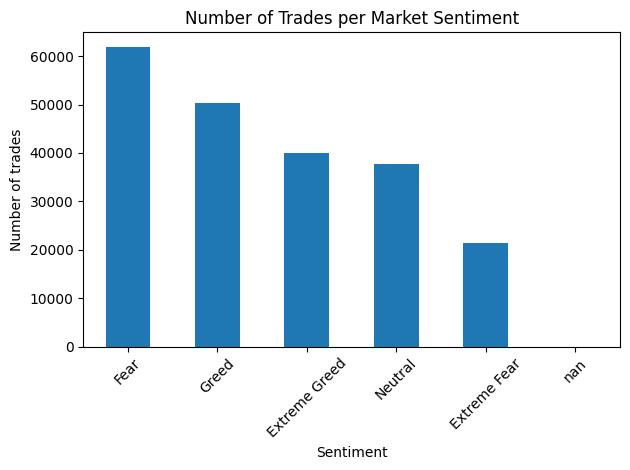

In [20]:
plt.figure()
sent_counts.plot(kind='bar')
plt.title("Number of Trades per Market Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of trades")
plt.xticks(rotation=45)
plt.tight_layout()

output_dir = "outputs"
os.makedirs(output_dir, exist_ok=True)
plt.savefig("outputs/trades_per_sentiment_1.png")

plt.show();



From above, we can understand that, when the market was in **Fear** the number of trades that took place was the Highest, whereas the when the market was in **Extreme Fear** the The trade took in less number

## 4. Trading Behaviour by Market Sentiment

In [21]:
# Group by sentiment and compute key metrics
group_cols = ['sentiment_class']

agg_by_sent = merged.groupby(group_cols).agg(
    trades=('Account', 'count'),
    total_usd_volume=('usd_volume', 'sum'),
    avg_usd_volume=('usd_volume', 'mean'),
    total_pnl=('Closed PnL', 'sum'),
    avg_pnl_per_trade=('Closed PnL', 'mean'),
    median_pnl=('Closed PnL', 'median'),
    win_rate=('is_profit', 'mean'),
    avg_fee=('Fee', 'mean')
).reset_index()

# Win rate as percentage
agg_by_sent['win_rate_pct'] = agg_by_sent['win_rate'] * 100

agg_by_sent.sort_values('trades', ascending=False)


,sentiment_class,trades,total_usd_volume,avg_usd_volume,total_pnl,avg_pnl_per_trade,median_pnl,win_rate,avg_fee,win_rate_pct
2,Fear,61837,4.833248e+08,7816.109931,3.357155e+06,54.290400,0.0,0.420768,1.495172,42.076750
3,Greed,50303,2.885825e+08,5736.884375,2.150129e+06,42.743559,0.0,0.384828,1.254372,38.482794
1,Extreme Greed,39992,1.244652e+08,3112.251565,2.715171e+06,67.892861,0.0,0.464943,0.675902,46.494299
4,Neutral,37686,1.802421e+08,4782.732661,1.292921e+06,34.307718,0.0,0.396991,1.044798,39.699093
0,Extreme Fear,21400,1.144843e+08,5349.731843,7.391102e+05,34.537862,0.0,0.370607,1.116291,37.060748


From Now, lets view the visualisation of our analysis by the sentiment_class

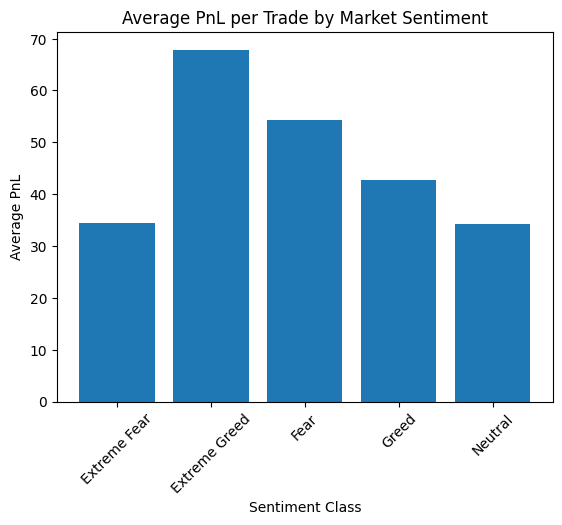

In [22]:
# Plot average PnL per trade by Sentiment_clasS
plt.figure()
plt.bar(agg_by_sent['sentiment_class'], agg_by_sent['avg_pnl_per_trade'])
plt.title("Average PnL per Trade by Market Sentiment")
plt.xlabel("Sentiment Class")
plt.ylabel("Average PnL")
plt.xticks(rotation=45)

plt.savefig("outputs/avg_pnl_sentiment_2.png", dpi=300, bbox_inches='tight')

plt.show()

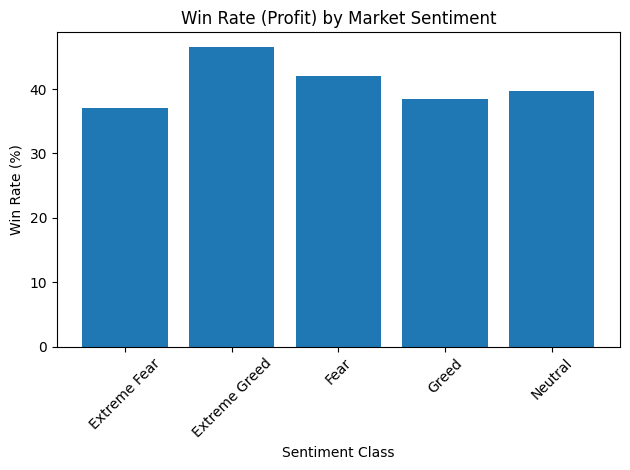

In [23]:
# Plot win rate by sentiment
plt.figure()
plt.bar(agg_by_sent['sentiment_class'], agg_by_sent['win_rate_pct'])
plt.title("Win Rate (Profit) by Market Sentiment")
plt.xlabel("Sentiment Class")
plt.ylabel("Win Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()


plt.savefig("outputs/win_rate_sentiment_3.png", dpi=300, bbox_inches='tight')

plt.show()

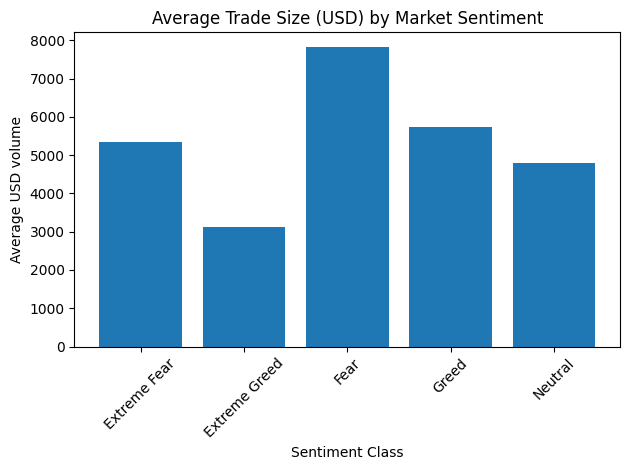

In [24]:
# Plot average USD volume per trade by sentiment
plt.figure()
plt.bar(agg_by_sent['sentiment_class'], agg_by_sent['avg_usd_volume'])
plt.title("Average Trade Size (USD) by Market Sentiment")
plt.xlabel("Sentiment Class")
plt.ylabel("Average USD volume")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("outputs/avg_USD_volume_sentiment_4.png", dpi=300, bbox_inches='tight')

plt.show()

## 5. Buy vs Sell Behaviour by Sentiment

In [25]:
# Count trades by sentiment and side
side_dist = (merged.groupby(['sentiment_class', 'Side']).size().reset_index(name='trade_count'))

print(side_dist)

  sentiment_class  Side  trade_count
0    Extreme Fear   BUY        10935
1    Extreme Fear  SELL        10465
2   Extreme Greed   BUY        17940
3   Extreme Greed  SELL        22052
4            Fear   BUY        30270
5            Fear  SELL        31567
6           Greed   BUY        24576
7           Greed  SELL        25727
8         Neutral   BUY        18969
9         Neutral  SELL        18717


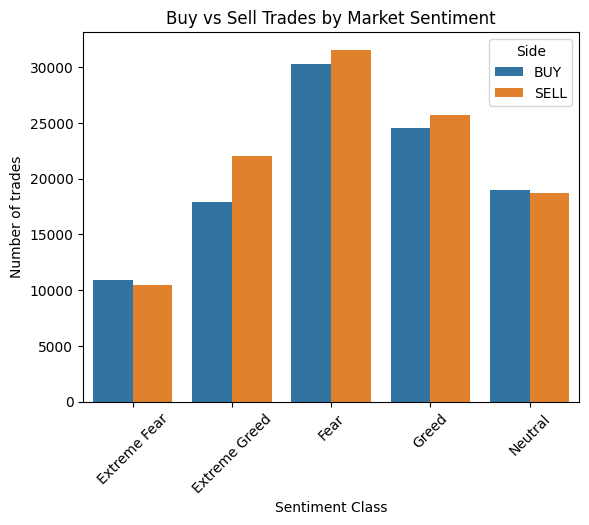

In [26]:
sns.barplot(x='sentiment_class', y='trade_count', hue='Side', data = side_dist);
plt.title("Buy vs Sell Trades by Market Sentiment")
plt.xlabel("Sentiment Class")
plt.ylabel("Number of trades")
plt.xticks(rotation=45)

plt.savefig("outputs/trade_count_sentiment&Side_5.png", dpi=300, bbox_inches='tight')

plt.show();

## 6. Time Series View:

In [27]:
# Aggregate daily USD volume & total PnL, then merge with sentiment
daily_stats = merged.groupby('trade_date').agg(
    daily_trades=('Account', 'count'),
    daily_usd_volume=('usd_volume', 'sum'),
    daily_pnl=('Closed PnL', 'sum')
).reset_index()

daily_stats = pd.merge(
    daily_stats,
    sent[['date', 'value', 'sentiment_class']],
    left_on='trade_date',
    right_on='date',
    how='left'
)

daily_stats.head()


,trade_date,daily_trades,daily_usd_volume,daily_pnl,date,value,sentiment_class
0,2023-05-01,3,477.00,0.000000,2023-05-01,63.0,Greed
1,2023-12-05,9,50005.83,0.000000,2023-12-05,75.0,Extreme Greed
2,2023-12-14,11,113203.35,-205.434737,2023-12-14,72.0,Greed
3,2023-12-15,2,10609.95,-24.632034,2023-12-15,70.0,Greed
4,2023-12-16,3,15348.77,0.000000,2023-12-16,67.0,Greed


In [28]:
sns.set_style('darkgrid')

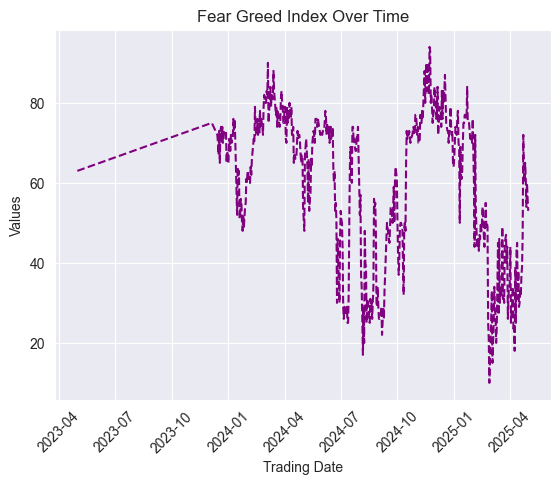

In [29]:

sns.lineplot(x='trade_date', y='value', data=daily_stats, linestyle='--', color='purple')
plt.title("Fear Greed Index Over Time")
plt.xlabel('Trading Date')
plt.ylabel('Values')
plt.xticks(rotation = 45)

plt.savefig("outputs/trade_date_value_6.png", dpi=300, bbox_inches='tight')

plt.show();

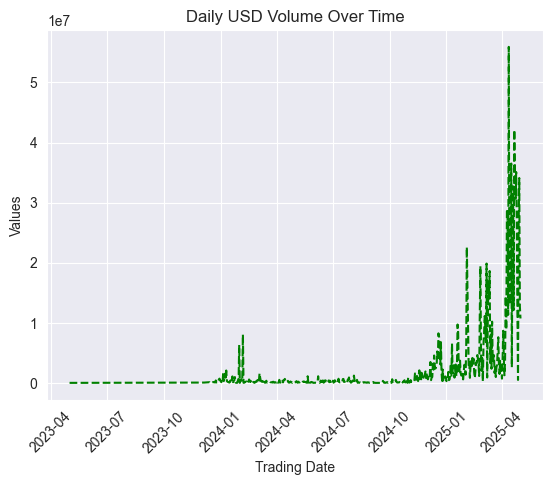

In [30]:
sns.lineplot(x='trade_date', y='daily_usd_volume', data=daily_stats, linestyle='--', color='green')
plt.title("Daily USD Volume Over Time")
plt.xlabel('Trading Date')
plt.ylabel('Values')
plt.xticks(rotation = 45)

plt.savefig("outputs/trade_date_dailyUSD_7.png", dpi=300, bbox_inches='tight')


plt.show();

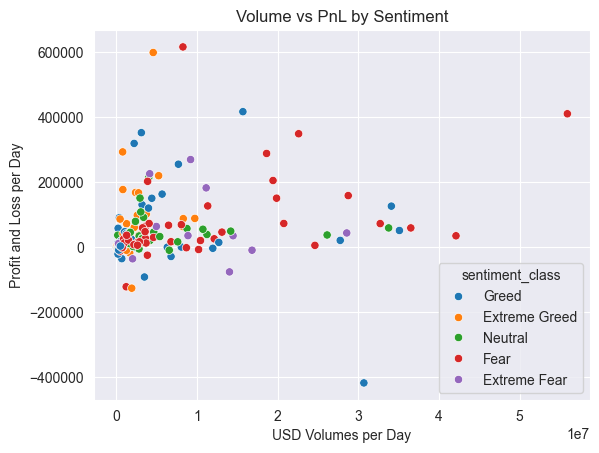

In [31]:
sns.scatterplot(data=daily_stats,x='daily_usd_volume', y='daily_pnl',hue='sentiment_class')
plt.xlabel("USD Volumes per Day")
plt.ylabel("Profit and Loss per Day")
plt.title("Volume vs PnL by Sentiment")

plt.savefig("outputs/dailyUSD_dailyPnL_8.png", dpi=300, bbox_inches='tight')

plt.show()

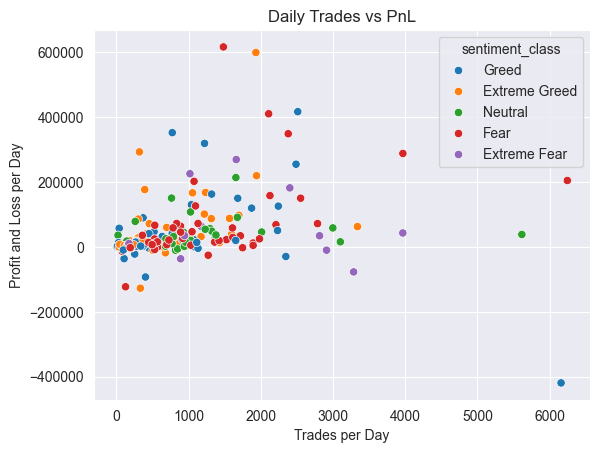

In [32]:
sns.scatterplot(data=daily_stats,x='daily_trades',y='daily_pnl',hue='sentiment_class')
plt.title("Daily Trades vs PnL")
plt.xlabel("Trades per Day")
plt.ylabel("Profit and Loss per Day")

plt.savefig("outputs/dailyTrades_dailyPnL_9.png", dpi=300, bbox_inches='tight')


plt.show()



## 7. Insights/Conclusions

1. **Profitability vs Sentiment**
   - The **Average PnL** is Highest on **Extreme Greed** Sentiment class.
   - Considering the Average PnL, Win Rate is also highest for **Extreme Greed**.
   - So we can say that Traders use the high leverage when the market was extremely Greedy.
   - While the cautious traders also perform better during the Fear market phase.

2. **Risk / Volume vs Sentiment**
   - The Average **Trade Size (USD volume)** is Highest for **Fear** and then Second Highest if for **Greed**.
   - The Average **Trade Size (USD volume)** is Lowest for Extreme Greed even though it perform the best resulting is at best in Profits

3. **Behavioural Patterns of Buying and Selling of trades**
   - It seems that, when Market was **Fear** traders have sell more than Buying the trades
   - During **Extreme Greed**, difference in count of Selling and Buying is the highest which means that traders sell more when they were more greedy rather buying any new trades
   - During **Extreme Fear**, both buy and sell of trades is leveling up meaning traders were more cautious about investing in trading of Bitcoin

4. **Time Series Analysis**
   - The values of started increasing till mid of 2023 and 2024 year.
   - Then we saw an complete Oscillation of increase and Decrease in values over the period of time till the year April 2025.
   - Considering, USD volume, there figures was alwasys low till the first hit showing slight rise in First month of 2024.
   - Then it again came down but eventually by the end year 2024 it shown gradual increase in the USD volume.
   - From this, we can conclude that people were slightly not interested in trading till mid 2024 but as awareness arise the USD volume increase in big values

5. From above all insights, we can suggest that
   - Extreme Greed: Traders may increase leverage considering the Volume and risk taking factor
   - Extreme Fear: Even though the USD volume is at better value, trader should not invest during the panic phase of market
   - Greed & Fear : as USD volume is better, trader who are more cautious, always makes more profit than greed, so trader should always be more cautious for buying and selling their trades which can make more Profits.
